In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os

In [4]:
# File ID from Google Drive
file_id = '1BX8Uce2Kj9sFNvyQaoKjoHClW-fK0VOn'

# Construct the Google Drive download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Local path to save the file
destination = 'flights.csv'

# Download the file
print("Downloading file from Google Drive...")
gdown.download(url, destination, quiet=False)
print("Download complete.")

# Check if file exists and has content
if os.path.exists(destination) and os.path.getsize(destination) > 0:
    # Read the CSV file
    try:
        data = pd.read_csv(destination, dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, low_memory=False)
        print(data.head())  # Display the first few rows to verify
    except Exception as e:
        print(f"Error reading the file: {str(e)}")
else:
    print("File download failed or file is empty.")
    exit()

# Check missing values in all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Print the number of rows and columns
num_rows, num_columns = data.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Keep only relevant columns
columns_to_keep = [
    'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
    'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
    'DEPARTURE_TIME', 'DEPARTURE_DELAY'
]
data = data[columns_to_keep]

# Remove rows with NaNs in required columns
data_cleaned = data.dropna(subset=columns_to_keep)

# Save the new file
cleaned_file_path = 'flights_cleaned.csv'
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Data cleaned and saved to {cleaned_file_path}")

# Read the cleaned file
data = pd.read_csv(cleaned_file_path, dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, low_memory=False)

# Check missing values in all columns again
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Print the number of rows and columns
num_rows, num_columns = data.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Downloading...
From (original): https://drive.google.com/uc?id=1BX8Uce2Kj9sFNvyQaoKjoHClW-fK0VOn
From (redirected): https://drive.google.com/uc?id=1BX8Uce2Kj9sFNvyQaoKjoHClW-fK0VOn&confirm=t&uuid=8733fdba-9452-42b7-8daa-5831bd07c288
To: /content/flights.csv
100%|██████████| 592M/592M [00:07<00:00, 81.6MB/s]


Download complete.
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DE

**H1**

    Airport  Betweenness_Centrality  Average_Departure_Delay
0       ANC                0.018417                 3.406816
1       SEA                0.011482                 6.800201
2       LAX                0.007247                10.669969
3       PBI                0.000339                12.300441
4       SFO                0.011569                11.190665
..      ...                     ...                      ...
623   15497                0.000000                 0.928571
624   12265                0.000000                 2.772727
625   14222                0.000000                89.111111
626   14025                0.000000                17.538462
627   13502                0.000000                -5.666667

[628 rows x 3 columns]


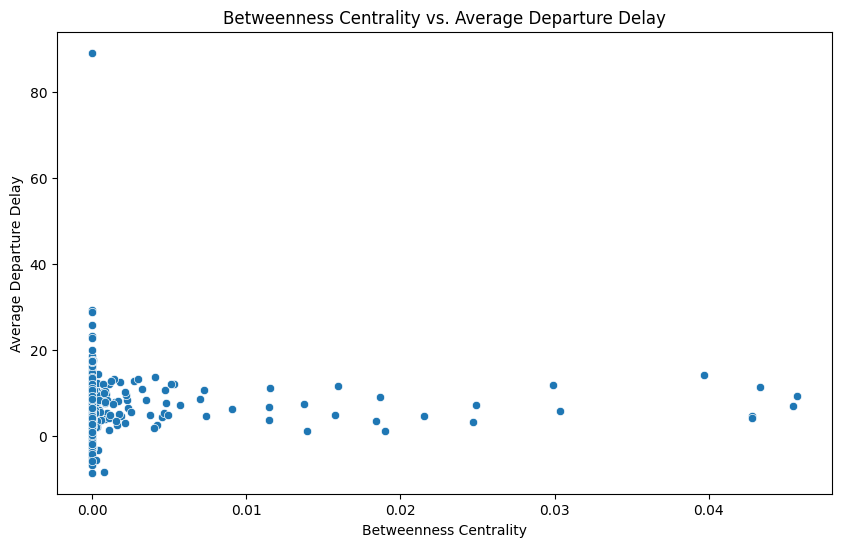

Correlation between Betweenness Centrality and Average Departure Delay: 0.06468392743963274


In [5]:


# קריאת הקובץ עם טיפול בערכים מעורבים
file_path = 'flights_cleaned.csv'  # ודא שהשם של הקובץ נכון
data = pd.read_csv(file_path, dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, low_memory=False)

# יצירת גרף מכוון מהנתונים
def create_directed_graph(data):
    G = nx.DiGraph()
    for index, row in data.iterrows():
        G.add_edge(row['ORIGIN_AIRPORT'], row['DESTINATION_AIRPORT'])
    return G

graph = create_directed_graph(data)

# חישוב Betweenness Centrality
betweenness = nx.betweenness_centrality(graph)

# יצירת DataFrame עבור מדדי המרכזיות
centrality_df = pd.DataFrame(list(betweenness.items()), columns=['Airport', 'Betweenness_Centrality'])

# חישוב עיכובים ממוצעים לכל נמל תעופה
delay_data = data.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
delay_data.columns = ['Airport', 'Average_Departure_Delay']

# מיזוג הנתונים
merged_data = pd.merge(centrality_df, delay_data, on='Airport')

# הדפסת התוצאות
print(merged_data)

# יצירת גרף להשוואת מדדי המרכזיות לעיכובים הממוצעים
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Betweenness_Centrality', y='Average_Departure_Delay', data=merged_data)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Average Departure Delay')
plt.title('Betweenness Centrality vs. Average Departure Delay')
plt.show()

# חישוב הקורלציה
correlation = merged_data['Betweenness_Centrality'].corr(merged_data['Average_Departure_Delay'])
print(f'Correlation between Betweenness Centrality and Average Departure Delay: {correlation}')

H2

January: 312 nodes, 2093 edges
February: 315 nodes, 2048 edges
March: 312 nodes, 2055 edges
Girvan-Newman - January: 2 communities
Girvan-Newman - February: 2 communities
Girvan-Newman - March: 2 communities
Louvain - January: 5 communities
Louvain - February: 5 communities
Louvain - March: 6 communities


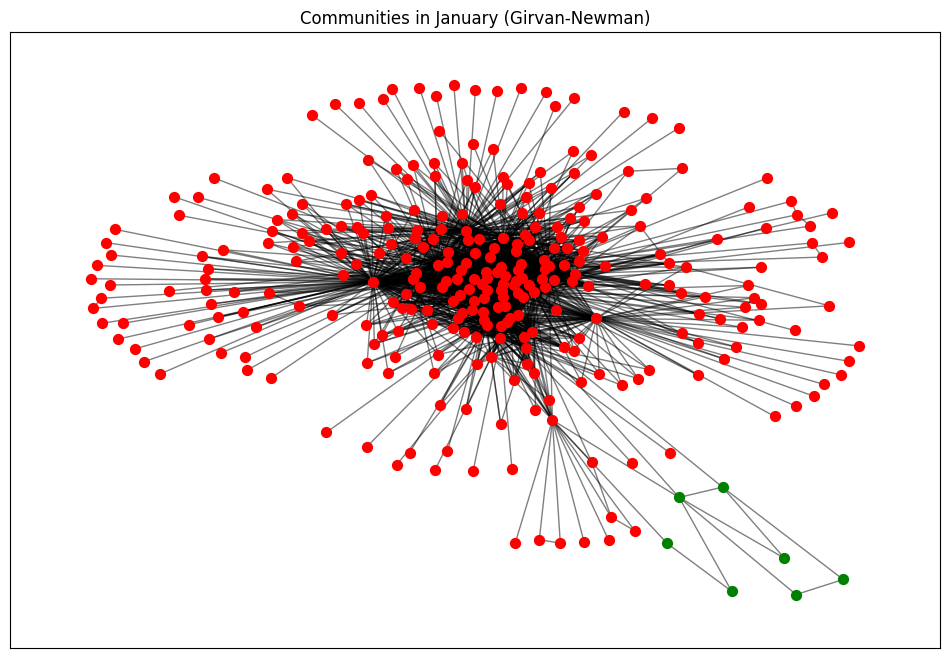

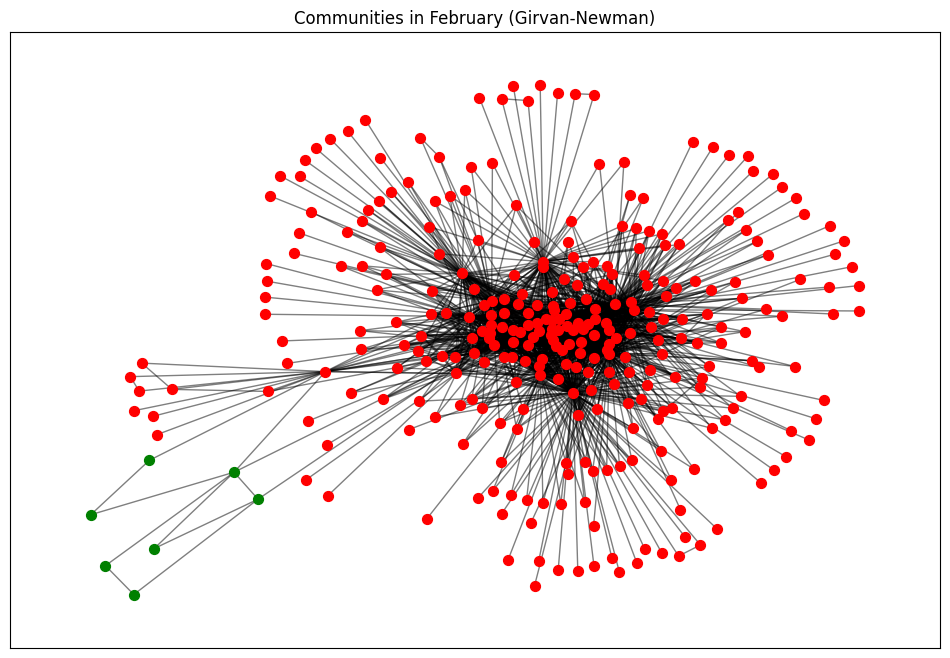

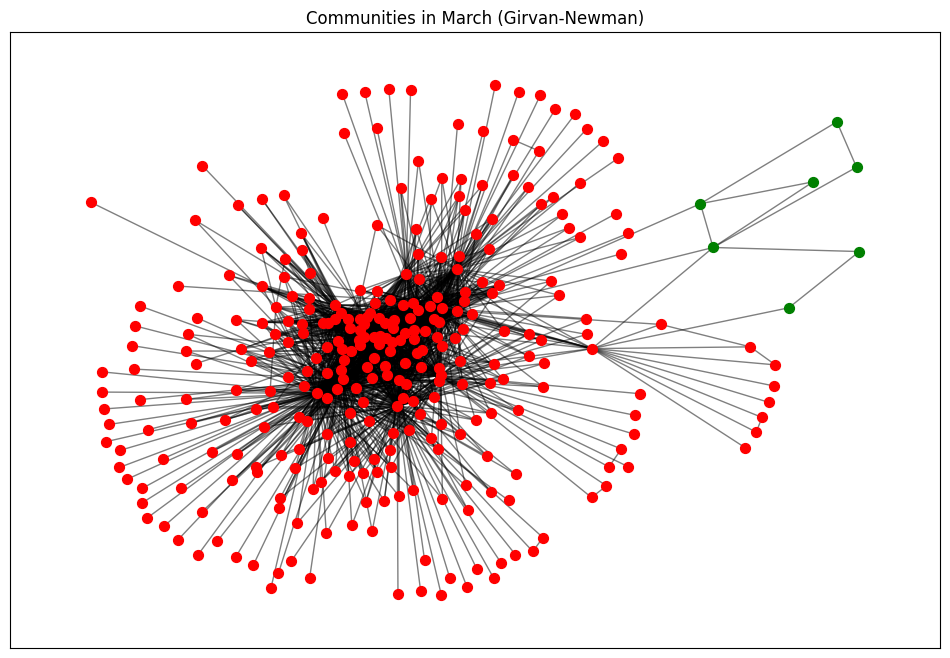

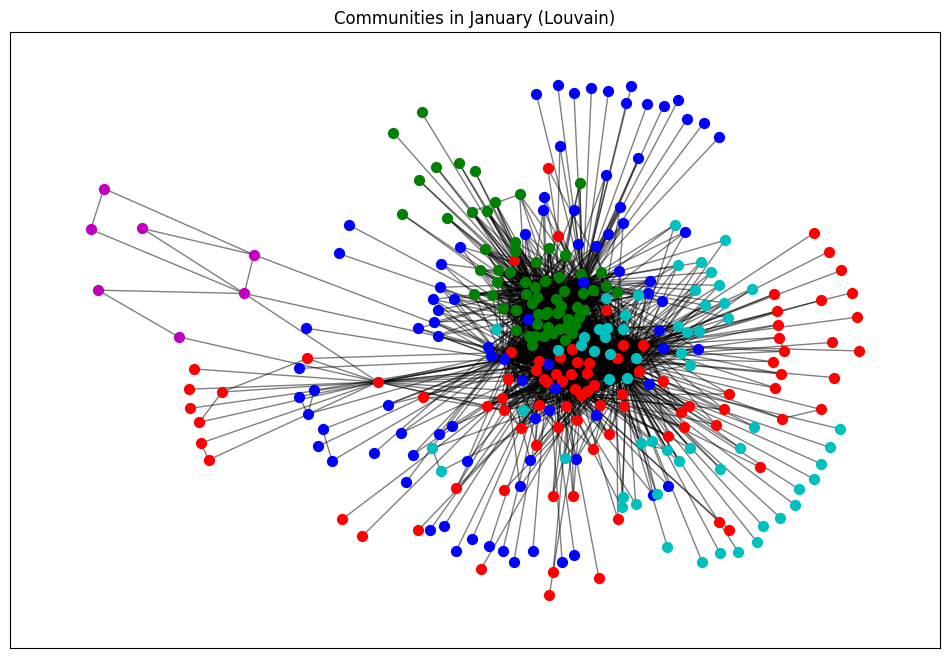

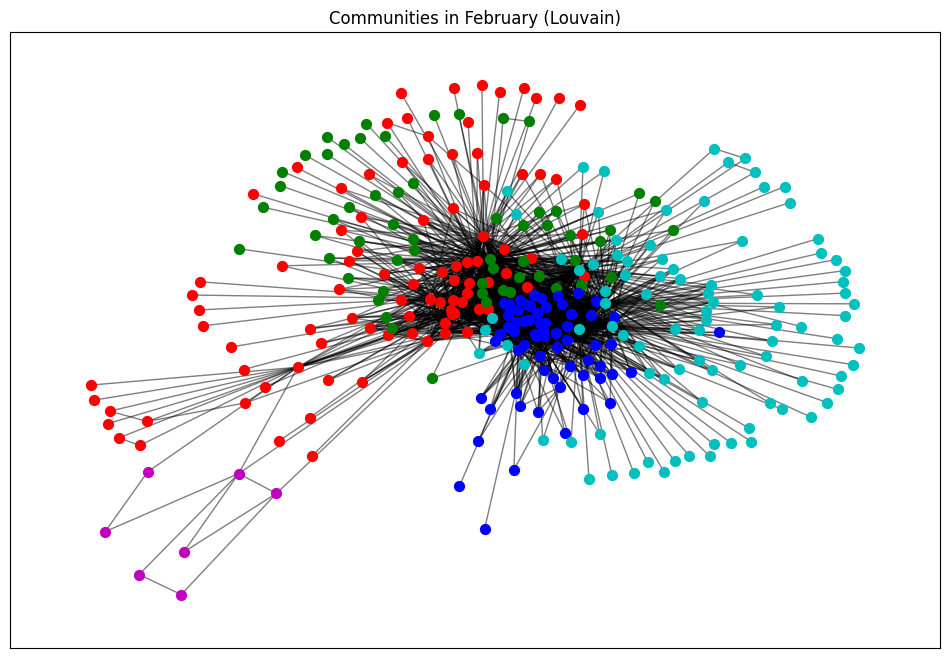

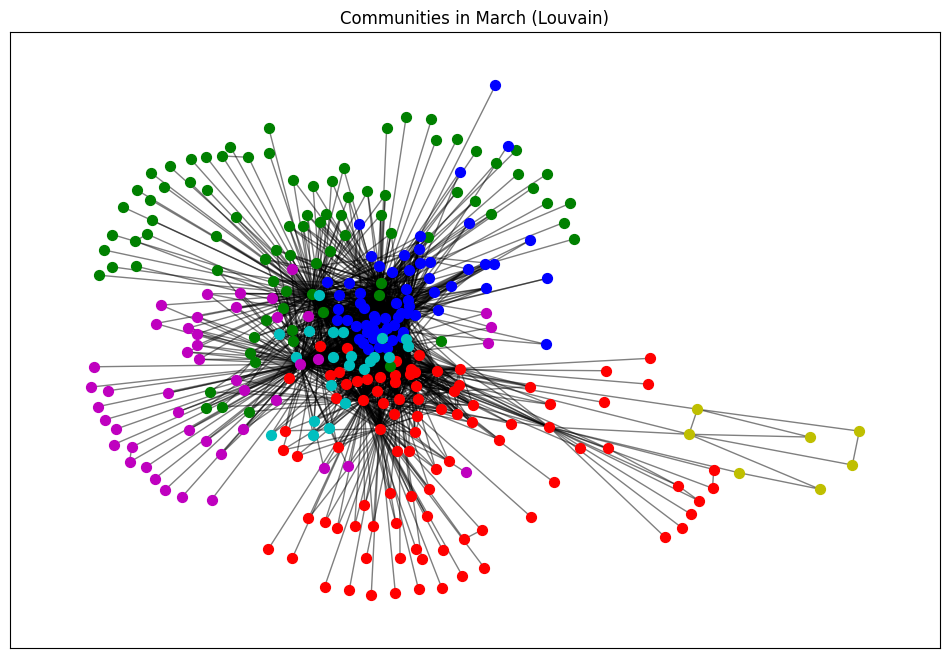

In [6]:
import networkx as nx
from networkx.algorithms.community import girvan_newman
import community.community_louvain as community_louvain
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# פונקציה לחלוקת הגרף לקהילות לפי אלגוריתם Girvan-Newman
def detect_girvan_newman_communities(graph):
    comp = girvan_newman(graph)
    return next(comp)

# פונקציה לחלוקת הגרף לקהילות לפי אלגוריתם Louvain
def detect_louvain_communities(graph):
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, community in partition.items():
        if community not in communities:
            communities[community] = []
        communities[community].append(node)
    return list(communities.values())

# יצירת גרפים עבור כל חודש
def create_graph(data):
    G = nx.Graph()
    for index, row in data.iterrows():
        G.add_edge(row['ORIGIN_AIRPORT'], row['DESTINATION_AIRPORT'])
    return G

# קריאת הקובץ
file_path = 'flights_cleaned.csv'
data = pd.read_csv(file_path, dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, low_memory=False)

data_january = data[data['MONTH'] == 1]
data_february = data[data['MONTH'] == 2]
data_march = data[data['MONTH'] == 3]

graph_january = create_graph(data_january)
graph_february = create_graph(data_february)
graph_march = create_graph(data_march)

# בדיקת מספר הצמתים והקשתות בכל חודש
print(f"January: {graph_january.number_of_nodes()} nodes, {graph_january.number_of_edges()} edges")
print(f"February: {graph_february.number_of_nodes()} nodes, {graph_february.number_of_edges()} edges")
print(f"March: {graph_march.number_of_nodes()} nodes, {graph_march.number_of_edges()} edges")

# זיהוי קהילות בכל חודש לפי Girvan-Newman
communities_january_gn = detect_girvan_newman_communities(graph_january)
communities_february_gn = detect_girvan_newman_communities(graph_february)
communities_march_gn = detect_girvan_newman_communities(graph_march)

num_communities_january_gn = len(list(communities_january_gn))
num_communities_february_gn = len(list(communities_february_gn))
num_communities_march_gn = len(list(communities_march_gn))

print(f"Girvan-Newman - January: {num_communities_january_gn} communities")
print(f"Girvan-Newman - February: {num_communities_february_gn} communities")
print(f"Girvan-Newman - March: {num_communities_march_gn} communities")

# זיהוי קהילות בכל חודש לפי Louvain
communities_january_louvain = detect_louvain_communities(graph_january)
communities_february_louvain = detect_louvain_communities(graph_february)
communities_march_louvain = detect_louvain_communities(graph_march)

num_communities_january_louvain = len(communities_january_louvain)
num_communities_february_louvain = len(communities_february_louvain)
num_communities_march_louvain = len(communities_march_louvain)

print(f"Louvain - January: {num_communities_january_louvain} communities")
print(f"Louvain - February: {num_communities_february_louvain} communities")
print(f"Louvain - March: {num_communities_march_louvain} communities")

# פונקציה לויזואליזציה של הקהילות
def plot_communities(graph, communities, title):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(12, 8))

    # יצירת מחזור צבעים
    colors = cycle(['r', 'g', 'b', 'c', 'm', 'y', 'k'])

    for community in communities:
        color = next(colors)
        nx.draw_networkx_nodes(graph, pos, nodelist=community, node_size=50, node_color=color)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# ויזואליזציה של הקהילות
plot_communities(graph_january, communities_january_gn, 'Communities in January (Girvan-Newman)')
plot_communities(graph_february, communities_february_gn, 'Communities in February (Girvan-Newman)')
plot_communities(graph_march, communities_march_gn, 'Communities in March (Girvan-Newman)')

plot_communities(graph_january, communities_january_louvain, 'Communities in January (Louvain)')
plot_communities(graph_february, communities_february_louvain, 'Communities in February (Louvain)')
plot_communities(graph_march, communities_march_louvain, 'Communities in March (Louvain)')

H3

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# קריאת הקובץ עם טיפול בערכים מעורבים
file_path = 'flights_cleaned.csv'  # ודא שהשם של הקובץ נכון
data = pd.read_csv(file_path, dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}, low_memory=False)

# יצירת גרף מכוון מהנתונים
def create_directed_graph(data):
    G = nx.DiGraph()
    for index, row in data.iterrows():
        G.add_edge(row['ORIGIN_AIRPORT'], row['DESTINATION_AIRPORT'])
    return G

graph = create_directed_graph(data)

# חישוב Closeness Centrality
closeness = nx.closeness_centrality(graph)

# יצירת DataFrame עבור מדדי המרכזיות
centrality_df = pd.DataFrame(list(closeness.items()), columns=['Airport', 'Closeness_Centrality'])

# חישוב מספר הטיסות לכל נמל תעופה
origin_counts = data['ORIGIN_AIRPORT'].value_counts()
destination_counts = data['DESTINATION_AIRPORT'].value_counts()
total_counts = origin_counts.add(destination_counts, fill_value=0).reset_index()
total_counts.columns = ['Airport', 'Total_Flights']

# מיזוג הנתונים
merged_data = pd.merge(centrality_df, total_counts, on='Airport')

# גרף פיזור (scatter plot) של Closeness Centrality לפי מספר הטיסות
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Closeness_Centrality', y='Total_Flights', data=merged_data)
plt.title('Closeness Centrality vs Total Flights')
plt.xlabel('Closeness Centrality')
plt.ylabel('Total Flights')
plt.show()

# חישוב הקורלציה
correlation = merged_data['Closeness_Centrality'].corr(merged_data['Total_Flights'])
print(f'Correlation between Closeness Centrality and Total Flights: {correlation}')